1) Load company file

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
company = pd.read_csv('crunchbase-companies.csv',encoding='latin-1')

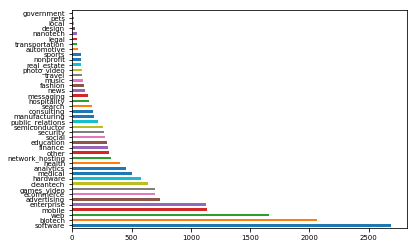

In [3]:
#company.dtypes
#company.head()
company.category_code.value_counts().plot('barh',fontsize=7)


In [4]:
software_company = company[company.category_code=='software']

In [5]:
#company.category_code
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
software_company.shape

(2688, 17)

2) Setup API to grab comments from reddit using company name

In [6]:
from psaw import PushshiftAPI
api = PushshiftAPI()
import datetime as dt
end_epoch = int(dt.datetime(2013, 10, 1).timestamp())

pretrained LSMT

In [7]:
import numpy as np
wordsList = np.load('/Users/xintongchen/LSTM-Sentiment-Analysis/training_data/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('/Users/xintongchen/LSTM-Sentiment-Analysis/training_data/wordVectors.npy')
print ('Loaded the word vectors!')
import tensorflow as tf
numDimensions = 300
maxSeqLength = 250
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.25)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('/Users/xintongchen/LSTM-Sentiment-Analysis/models'))

import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

def getSentenceMatrix(sentence):
    arr = np.zeros([batchSize, maxSeqLength])
    sentenceMatrix = np.zeros([batchSize,maxSeqLength], dtype='int32')
    cleanedSentence = cleanSentences(sentence)
    split = cleanedSentence.split()
    for indexCounter,word in enumerate(split):
        try:
            sentenceMatrix[0,indexCounter] = wordsList.index(word)
        except ValueError:
            sentenceMatrix[0,indexCounter] = 399999 #Vector for unkown words
    return sentenceMatrix

Loaded the word list!
Loaded the word vectors!


In [8]:
#len(inputText[1:250])

NameError: name 'inputText' is not defined

inputText = ""
inputMatrix = getSentenceMatrix(inputText)
predictedSentiment = sess.run(prediction, {input_data: inputMatrix})[0]
if (predictedSentiment[0] > predictedSentiment[1]):
    sentiment = "Positive"
else:
    sentiment = "Negative"

In [9]:
company_names = software_company.name
company_names = company_names[1:]
reddit = open('company_on_reddit','w')
for c in company_names:
    comments = ""
    print (c)
    gen_company = api.search_comments(q=c,
                                      before=end_epoch,
                                      subreddit='business')
    result_company = list(gen_company)
    num_comments = len(result_company)
    if num_comments > 1:
        for i in range(0,num_comments-1):
            #comments.append(result_company[i].d_['body'])
            comments = ''.join([comments,(result_company[i].d_['body'])])
    elif num_comments == 1:
        comments = result_company[0][3]
    if num_comments == 0:
        inputText =comments
        sentiment = "NA"
    if len(comments) >=250:
        inputText = comments[0:249]
        inputMatrix = getSentenceMatrix(inputText)
        predictedSentiment = sess.run(prediction, {input_data: inputMatrix})[0]
        if (predictedSentiment[0] > predictedSentiment[1]):
            sentiment = "Positive"
        else:
            sentiment = "Negative"
    elif len(comments) < 250  and len(comments)>0:
        inputText = comments
        inputMatrix = getSentenceMatrix(inputText)
        predictedSentiment = sess.run(prediction, {input_data: inputMatrix})[0]
        if (predictedSentiment[0] > predictedSentiment[1]):
            sentiment = "Positive"
        else:
            sentiment = "Negative"
    print (inputText)
    to_write = [c, str(num_comments), str(sentiment)]
    reddit.write("\t".join(to_write)+"\n")
    print (to_write)
    

.Club Domains

['.Club Domains', '0', 'NA']
1010data

['1010data', '0', 'NA']
10X10 Room

['10X10 Room', '0', 'NA']
121nexus

['121nexus', '0', 'NA']
15Five

['15Five', '0', 'NA']
170 Systems

['170 Systems', '0', 'NA']
1Energy Systems

['1Energy Systems', '0', 'NA']
24PageBooks

['24PageBooks', '0', 'NA']
250ok

['250ok', '0', 'NA']
27 bards

['27 bards', '0', 'NA']
2GO Mobile Solutions

['2GO Mobile Solutions', '0', 'NA']
2nd Story Software, Inc.

['2nd Story Software, Inc.', '0', 'NA']
30 Second Showcase

['30 Second Showcase', '0', 'NA']
3ClickEMR Corporation

['3ClickEMR Corporation', '0', 'NA']
3D Sports Technology

['3D Sports Technology', '0', 'NA']
3D Systems
All species, planets, systems, etc go through boom bust cycles. I remember from my early years a drawing in a science book (I think) that showed an [offset pair of waves](https://www.google.com/search?q=deer+wolf+curve&amp;safe=off&amp;client=safari
['3D Systems', '10', 'Negative']
3Gear Systems

['3Gear Systems', '0', 'N


['Anthology Solutions', '0', 'NA']
ANTs Software
Tell me about it. I'm reviewing code from an Indian software group (not offshore as it is local, but I'm in the middle east). Amazing the shit that they don't test before handing to me for review. This is honestly how I developed back in high school
['ANTs Software', '1', 'Negative']
Anystream

['Anystream', '0', 'NA']
ApeSoft

['ApeSoft', '0', 'NA']
Apiary

['Apiary', '0', 'NA']
Apiphany

['Apiphany', '0', 'NA']
Aplos Software

['Aplos Software', '0', 'NA']
Apmetrix

['Apmetrix', '0', 'NA']
Apogee Informatics

['Apogee Informatics', '0', 'NA']
Apparity

['Apparity', '0', 'NA']
AppAssure Software

['AppAssure Software', '0', 'NA']
AppDynamics

['AppDynamics', '0', 'NA']
Appian

['Appian', '0', 'NA']
AppIterate.com

['AppIterate.com', '0', 'NA']
Application Experts
vashitech.com is mobile application Development Company with expertise in developing apps for iPhone, Android and many more. Hire our experts to get high quality solutions for


['AVST', '0', 'NA']
AwarenessHub

['AwarenessHub', '0', 'NA']
Awarepoint

['Awarepoint', '0', 'NA']
AwesomeTouch

['AwesomeTouch', '0', 'NA']
aWhere

['aWhere', '0', 'NA']
AWR Corporation

['AWR Corporation', '0', 'NA']
Axceler

['Axceler', '0', 'NA']
Axeda

['Axeda', '0', 'NA']
Axentis Software

['Axentis Software', '0', 'NA']
Axial Exchange

['Axial Exchange', '0', 'NA']
Axilogix Education

['Axilogix Education', '0', 'NA']
Axiom Education
&gt;I'm not certain it's a solid hypothesis that this historic observation of yours will keep happening.

What evidence do you have to come to this conclusion?  If history has always been one way, then what is it that will make it stop?  Remember, h
['Axiom Education', '2', 'Negative']
Axion Health

['Axion Health', '0', 'NA']
Azaire Networks

['Azaire Networks', '0', 'NA']
Azimuth Systems

['Azimuth Systems', '0', 'NA']
Azumio

['Azumio', '0', 'NA']
B-hive Networks

['B-hive Networks', '0', 'NA']
BA Insight
MBA student here.  Of course because of


['Bramasol', '0', 'NA']
Brand Networks
We must apply ourselves. The brand or personal branding is a growing trend due to the social networks that causes its importance.
Stay connected with your customers through social networks. Aadicia will help you to build your brand across the web an
['Brand Networks', '16', 'Positive']
Brandfolder

['Brandfolder', '0', 'NA']
Brandizi

['Brandizi', '0', 'NA']
brandlive

['brandlive', '0', 'NA']
BravoSolution

['BravoSolution', '0', 'NA']
Breker Verification Systems

['Breker Verification Systems', '0', 'NA']
Brevado

['Brevado', '0', 'NA']
Brevity
Sorry I was on my phone so brevity took priority over clarity. First of all, there are countries in the world with better data protection legislation than ours and governments that actually do follow the letter and spirit of those laws. Secondly, si
['Brevity', '28', 'Negative']
Brickfish

['Brickfish', '0', 'NA']
Bridgeline Digital

['Bridgeline Digital', '0', 'NA']
BridgePort Networks

['BridgePort Net


['Clarus Systems', '0', 'NA']
ClassLink

['ClassLink', '0', 'NA']
Clear Shape Technologies

['Clear Shape Technologies', '0', 'NA']
Clear Story Systems
Seven Changes I Made to Change My Life

How to Network Your Life Into Profits


By Richard Ravarino

My buddy Randy tried to pound this one into my head over the last four years, but I am stubborn (and he can be an ass at times), so it took some dog
['Clear Story Systems', '2', 'Positive']
ClearApp

['ClearApp', '0', 'NA']
ClearContext

['ClearContext', '0', 'NA']
Clearleap

['Clearleap', '0', 'NA']
ClearMomentum

['ClearMomentum', '0', 'NA']
ClearPoint Learning Systems

['ClearPoint Learning Systems', '0', 'NA']
ClearPoint Metrics

['ClearPoint Metrics', '0', 'NA']
Clearview International

['Clearview International', '0', 'NA']
Clearway Technology Partners

['Clearway Technology Partners', '0', 'NA']
Clearwell Systems

['Clearwell Systems', '0', 'NA']
CLEO Communications

['CLEO Communications', '0', 'NA']
Click4Ride

['Click4Ride', '


['ConteXtream', '0', 'NA']
Continuent

['Continuent', '0', 'NA']
Continuity Engine

['Continuity Engine', '0', 'NA']
Continuity Software
Ex-textbook publishing industry person here -- no, that's not it. It's not that textbook are so good and so hard to make. It's the hideous, hideous inefficiencies and bad management that add cost.

Most books you read are written by an author, edite
['Continuity Software', '2', 'Negative']
ContinuityX Solutions

['ContinuityX Solutions', '0', 'NA']
Contrail Systems

['Contrail Systems', '0', 'NA']
Conversocial

['Conversocial', '0', 'NA']
Convio

['Convio', '0', 'NA']
Conviva

['Conviva', '0', 'NA']
Convoke Systems

['Convoke Systems', '0', 'NA']
Coopkanics

['Coopkanics', '0', 'NA']
Copiun

['Copiun', '0', 'NA']
CopperKey

['CopperKey', '0', 'NA']
Coppertino

['Coppertino', '0', 'NA']
Coral Networks

['Coral Networks', '0', 'NA']
CorasWorks

['CorasWorks', '0', 'NA']
Corduro

['Corduro', '0', 'NA']
Core Security Technologies
Quite. 

What you are se


['DemandTec', '0', 'NA']
Demibooks

['Demibooks', '0', 'NA']
Demonstrare

['Demonstrare', '0', 'NA']
DepotPoint

['DepotPoint', '0', 'NA']
Derceto

['Derceto', '0', 'NA']
Derivix

['Derivix', '0', 'NA']
DermApproved

['DermApproved', '0', 'NA']
Desert Newco Managers

['Desert Newco Managers', '0', 'NA']
Design Clinicals

['Design Clinicals', '0', 'NA']
Design2Launch

['Design2Launch', '0', 'NA']
DeskGod

['DeskGod', '0', 'NA']
Desmos

['Desmos', '0', 'NA']
Devver

['Devver', '0', 'NA']
DEY Storage Systems

['DEY Storage Systems', '0', 'NA']
Dialogic
with emergent long-form journalism and folks like Didion and others out there, you aren't really seeing any kind of media-driven quality loss. you're just introducing more quantity. but as reputation and quality emerge, that number stabilizes.
it's 
['Dialogic', '1', 'Positive']
Diamond Fortress Technologies

['Diamond Fortress Technologies', '0', 'NA']
Digabit

['Digabit', '0', 'NA']
Digigraph.me

['Digigraph.me', '0', 'NA']
Digital Assen

Amazon invests in cloud deployment venture as Elastra raises another $12 million
['Elastra', '2', 'Positive']
Electric Cloud
Someone has to:

Drive the carriages 

Clear the horse poop from the streets (cars)

Sweep the chimney of every house before each winter (electric heating)

Deliver the news papers (internet)

Book your travel plans (orbitz)

Deliver your messages a
['Electric Cloud', '3', 'Negative']
Electric Rain

['Electric Rain', '0', 'NA']
Electron Database

['Electron Database', '0', 'NA']
ELERTS

['ELERTS', '0', 'NA']
Elevate Digital

['Elevate Digital', '0', 'NA']
Elitecore Technologies

['Elitecore Technologies', '0', 'NA']
Ellevation
A poor online reputation costs money! We fix up damaged online reputations. Our methods will improve your reputation across Google search, review sites, blogs and Social Media. A fully tailored reputation management strategy from Ellevation will com
['Ellevation', '1', 'Positive']
EmailFilm Technologies

['EmailFilm Technologies', '0', 'NA'


['Factor.io', '0', 'NA']
famo.us

['famo.us', '0', 'NA']
FanGo
Wow... you managed to turn a comment by one person into the action of all of Reddit.

Way to go FANGO, you've done the same.how come fango kicks so much ass?!
['FanGo', '3', 'Positive']
Fanplayr

['Fanplayr', '0', 'NA']
Farelogix

['Farelogix', '0', 'NA']
FarmLogs

['FarmLogs', '0', 'NA']
Fastmobile

['Fastmobile', '0', 'NA']
FastModel Sports

['FastModel Sports', '0', 'NA']
FastScaleTechnology

['FastScaleTechnology', '0', 'NA']
FastSoft

['FastSoft', '0', 'NA']
Fatwire

['Fatwire', '0', 'NA']
Favery

['Favery', '0', 'NA']
Feedgen

['Feedgen', '0', 'NA']
Fendza Employee Scheduling Software

['Fendza Employee Scheduling Software', '0', 'NA']
Feuerlabs

['Feuerlabs', '0', 'NA']
Fiducioso Advisors

['Fiducioso Advisors', '0', 'NA']
Fieldglass

['Fieldglass', '0', 'NA']
Fielding Systems
&gt; is that not part of what you learn (or can choose to focus on) in a CompSci degree?

Writing little scripts and understanding computer/n


['GigaTrust', '0', 'NA']
Ginger Software

['Ginger Software', '0', 'NA']
GitHub
As the author of a not-popular-then-insanely-popular open source product let me tell you: People *do* review the code.

Long before my project was in the top 50 on Github I had two people email me with theoretical flaws they'd found in the deepest, 
['GitHub', '9', 'Positive']
Giveo

['Giveo', '0', 'NA']
Giving Assistant
All right, here we go!
	
I bet you would be quite busy tomorrow with all the FAM thing, if you are still working on Microsoft case, so I will try to make it brief.

The first thing I hope we can both agree on is that when talking about split Microso
['Giving Assistant', '10', 'Negative']
GIVVER

['GIVVER', '0', 'NA']
Glassbeam

['Glassbeam', '0', 'NA']
Glider
**CLEAN FREAKS**

*by Michelle*

We really *Love* to clean!

Yadda yadda

------------

Serving blah blah counties

--------------

Standard cleaning service package:

(List of services)

Premium Cleaning Service Options:

(Other list


['Higgle', '0', 'NA']
High Street Partners
From another ask thread but you can get the idea.
&gt;Where did you get the idea for your business and what is it?

I live in a state that is very big in genealogy, which in turn all of my family was too. My mom would always ask me if I could transf
['High Street Partners', '1', 'Positive']
HighRoads

['HighRoads', '0', 'NA']
Highwinds

['Highwinds', '0', 'NA']
Hillcrest Labs

['Hillcrest Labs', '0', 'NA']
Hippocrates Gate

['Hippocrates Gate', '0', 'NA']
HireIQ Solutions

['HireIQ Solutions', '0', 'NA']
HiringThing

['HiringThing', '0', 'NA']
HiWired

['HiWired', '0', 'NA']
HomeSphere

['HomeSphere', '0', 'NA']
Hook Mobile
Let's revisit this discussion when those lawsuits are paid out. I think you'll be surprised by how easy Facebook gets off the hook.

&gt; But they don't lock in higher gains down the line because of mobile projections. There would be a minor increas
['Hook Mobile', '4', 'Negative']
Hoopla Software
If software patents were 


['innRoad', '0', 'NA']
INRIX
My company does this, sorta.  We pay companies like UPS and tucking cos and taxi cos that are satelite uplink-enabled to send us their data on their speed, then we generate traffic speeds for all roads in the country. 

Inrix Inc.   http://www.inr
['INRIX', '1', 'Negative']
InsideAxisã¢

['InsideAxis\x89ã¢', '0', 'NA']
Insightly
Definitely get an LLC and file for EIN. My partner and I just did all of that for under $250, and it feels great to know we are legal. I really recommend a book - $100 Startups. I've been implementing the suggestions every day -and they work! As far
['Insightly', '2', 'Positive']
Insightpool

['Insightpool', '0', 'NA']
Inspro

['Inspro', '0', 'NA']
InstaJob

['InstaJob', '0', 'NA']
Instant BioScan

['Instant BioScan', '0', 'NA']
Instantis

['Instantis', '0', 'NA']
InStoreFinance.com

['InStoreFinance.com', '0', 'NA']
Insurance Technologies
Sadly enough you are pretty correct. But at the end of the day, insurance companies are payi


['Kinesio Capture', '0', 'NA']
Kingfish Labs

['Kingfish Labs', '0', 'NA']
Kingland Companies

['Kingland Companies', '0', 'NA']
Kinnser Software

['Kinnser Software', '0', 'NA']
KISSmetrics

['KISSmetrics', '0', 'NA']
Kitenga

['Kitenga', '0', 'NA']
KiwiTech

['KiwiTech', '0', 'NA']
Kleermail

['Kleermail', '0', 'NA']
Kleo

['Kleo', '0', 'NA']
Kno
If it was a typo, that's understandable. But he wouldn't be the first perso to abbreviate the word know. 

U kno wat i mean?&gt;You do kno 

Really? How hard is it to write out the word "know"?You do kno that although Samsung imitated some aspects o
['Kno', '7', 'Negative']
Knoa Software

['Knoa Software', '0', 'NA']
Knotice

['Knotice', '0', 'NA']
KnowFu

['KnowFu', '0', 'NA']
Knowledge Factor
Be it any glue manufacturer or supplier with potential knowledge of adhesives, might advise the end users to make use of hot melt glue due its quick drying factor.
When we have some basic knowledge about the vending business then it plays a key fact



['LugIron Software', '0', 'NA']
Lumigent Technologies

['Lumigent Technologies', '0', 'NA']
LUMOback

['LUMOback', '0', 'NA']
Luristic

['Luristic', '0', 'NA']
Luxanova

['Luxanova', '0', 'NA']
LVL7 Systems

['LVL7 Systems', '0', 'NA']
Lyatiss

['Lyatiss', '0', 'NA']
Lyft
&gt; Most people are not paying the use tax that they should, thus circumventing the law and giving amazon an unfair benefit.

Again, so what? Most people don't pay the use tax, and it was unfair to the brick and mortar small businesses. Even if it'
['Lyft', '2', 'Positive']
Lytics

['Lytics', '0', 'NA']
M-Factor
Are you serious? Note that I never said that it was perfectly inelastic. I just said that it's unlikely to have a substantial effect.

Kim, et al. "Food Taxation and Pricing Strategies to “Thin Out” the Obesity Epidemic" Am J Prev Med. 2006 May;30(5
['M-Factor', '5', 'Positive']
M-Files
Group items tagged myblackhawkmines.newsvine.com - My BlackHawk Mines Music | Diigo Groups
Seeded on Sun Jul 15, 2012 11:38


['MetraTech', '0', 'NA']
Metreos Corporation

['Metreos Corporation', '0', 'NA']
MetricStream

['MetricStream', '0', 'NA']
Mezeo Software

['Mezeo Software', '0', 'NA']
Mformation Technologies

['Mformation Technologies', '0', 'NA']
MicroEdge

['MicroEdge', '0', 'NA']
Migo Software

['Migo Software', '0', 'NA']
Milestone Software
I wonder who did NOT see that happen? Obviously media was completely biased in this - with their cute little Facebook going public - but I don't know anyone who did not see it coming that Facebook's value will drop immensely the moment it goes IPO.

['Milestone Software', '1', 'Positive']
Mimosa Systems

['Mimosa Systems', '0', 'NA']
Minbox

['Minbox', '0', 'NA']
Mind-Alliance Systems

['Mind-Alliance Systems', '0', 'NA']
MINDBODY

['MINDBODY', '0', 'NA']
Mindjet
Mike and Bettina Jetter, Founders of Mindjet, have created a new Web 2.0 Life Coaching application Coaching Sanctuary. Putting a technological twist on tradition, Coaching Sanctuary brings life coach


['netFactor', '0', 'NA']
NetManage

['NetManage', '0', 'NA']
Netscape
They are an anti-competitive company that has focused on limiting competition rather than improving their products or allowing for an environment where other can create improved products. In the 90s there was competition for internet browsers, IE an
['Netscape', '80', 'Positive']
Netsmart Technologies

['Netsmart Technologies', '0', 'NA']
Netuitive

['Netuitive', '0', 'NA']
NetWitness

['NetWitness', '0', 'NA']
Network Chemistry
I agree with your final sentiment (and I appreciate the wit - seriously!):
&gt;I would point out that your statement that "People will always argue that what they did was the "smart" thing or better choice. It is human nature." goes both ways.

Pers
['Network Chemistry', '1', 'Positive']
Network Optix

['Network Optix', '0', 'NA']
Network Physics
Kevin Drum speculated that [firing neutrinos through the earth's curve from DC to Chicago might have shaved off enough time](http://www.motherjones

BLACK HAWK MINES : BLACK HAWK MINES MY BLACKHAWK MINES MUSIC

Terms of Use My Black Hawk Mines Music: Terms of Use My Black Hawk Mines Music My BlackHawk Mines Music requires that all visitors to its Blog adhere to the following Terms of Use. By acc
['Open Box Technologies', '1', 'Negative']
Open Kernel Labs

['Open Kernel Labs', '0', 'NA']
Open-Xchange

['Open-Xchange', '0', 'NA']
OpenAir
We use [OpenAir](http://openair.com/) but I have no idea what it costs for an organization your size... 
['OpenAir', '1', 'Negative']
OpenCandy

['OpenCandy', '0', 'NA']
OpenCare

['OpenCare', '0', 'NA']
OpenClovis

['OpenClovis', '0', 'NA']
OpenDesks, Inc.

['OpenDesks, Inc.', '0', 'NA']
OpenDrive

['OpenDrive', '0', 'NA']
OpenQ

['OpenQ', '0', 'NA']
Opscode

['Opscode', '0', 'NA']
Optify

['Optify', '0', 'NA']
Optimal Technologies
A series-hybrid using a small turbine instead of a small piston engine could actually be superior. The main drawback of the Chrysler turbine cars is that they went the ro

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [ ]:
inputMatrix.shape

In [ ]:
reddit.close()

In [8]:
software_company[software_company.name=='Anthology Solutions']

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
920,/company/anthology-solutions,Anthology Solutions,software,10000000,operating,USA,CA,SF Bay,Santa Clara,1,1999-01-01,1999-01,1999-Q1,1999.0,2006-02-06,2006-02-06,2005-01-01


In [14]:
result_company[0][3]

'Tell me about it. I\'m reviewing code from an Indian software group (not offshore as it is local, but I\'m in the middle east). Amazing the shit that they don\'t test before handing to me for review. This is honestly how I developed back in high school and the guy is at least ten years older than me. WHile it looks nice on the outside (good looking UI, relatively intuitive with some tweaks), the code is fucking awful. It\'s like painting your house in a nice color paint and spending money getting the windows fixed but allowing ants, roaches, and fucking mold grow all over the inside. \n\nI didn\'t make the call to bring this developer on (I was perfectly willing to do it myself), but we\'re getting the work for a rock-bottom lumpsum amount. I\'ve had arguments with the guy about demanding too many "changes" like...I don\'t know...fixing the crash that happens and can be easily reproduced, or correcting the spelling of just about everything the user can read, or even fixing failed test